In [1]:
# GRADER_ONLY
autograded_result = {
    "netid": None,
    "order": [],
    "student_score": 0,
    "total_available": 0,
    "breakdown": {}
}

def record_part(part_name, did_pass, available_points, message=""):
    global autograded_result
    
    # If already graded, remove previous graded order entry for this part
    if part_name in autograded_result["order"]:
        print("[Warning] Autograder: Part already graded or a duplicate key exists")
        autograded_result["order"].remove(part_name)
    
    # Record graded order
    autograded_result["order"].append(part_name)
    
    # Add graded result for this part
    autograded_result["breakdown"][part_name] = {
        "available_points": available_points,
        "points": available_points if did_pass else 0,
        "did_pass": did_pass,
        "message": message,
    }
    
    # Recalculate total_points and total_available points
    autograded_result["student_score"] = 0
    autograded_result["total_available"] = 0
    
    for part_info in autograded_result["breakdown"].values():
        autograded_result["student_score"] += part_info["points"]
        autograded_result["total_available"] += part_info["available_points"]
    
    print(autograded_result)

# Problem Set 2 - Starbucks App Data

- 🏆 80 points available
- ✏️ Last updated on 10/08/2021
- 📆 Due 10/14 Thursday 3:30 PM

▶️ First, run the code cell below to import `unittest`, a module used for **🧭 Check Your Work** sections and the autograder.

In [2]:
# DO NOT MODIFY THE CODE IN THIS CELL
import unittest
tc = unittest.TestCase()

assignment_name = "problem-set-02"
is_autograder_env = 'record_part' in globals().keys()

if is_autograder_env:
    autograded_result["assignment_name"] = assignment_name

---

### 🎯 Enter your NetID

- 👇 Fill in the value of `netid` with your **NetID** below.
    - This value will be used by the autograder.

In [3]:
netid = ""

print(f"Your NetID is {netid}.")

Your NetID is .


In [4]:
# GRADER_ONLY
# This code will be stripped to the student-distributed version
netid = "grader_netid"

#### 🧭 Check Your NetID

If the code cell below doesn't throw an error, you're ready to begin this assignment.

In [5]:
# DO NOT CHANGE THE CODE BELOW
tc.assertIsNotNone(netid)
tc.assertIsInstance(netid, str)
tc.assertNotEqual(netid.strip(), "", "Did you forget to enter your NetID?")
tc.assertFalse(netid.strip().isdecimal(), "Did you enter your UIN instead of your NetID?")

if is_autograder_env:
    autograded_result["netid"] = netid

---

### 🎯 Part 1: Import Pandas and NumPy

#### 👇 Tasks

- ✔️ Import the following Python packages.
    1. `pandas`: Use alias `pd`.
    2. `numpy`: Use alias `np`.

In [6]:
# YOUR CODE BEGINS
import pandas as pd
import numpy as np
# YOUR CODE ENDS

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [7]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-01"
did_pass = True
available_points = 2
message = ""

try:
    tc.assertTrue("pd" in globals(), "Check whether you have correctly import Pandas with an alias.")
    tc.assertTrue("np" in globals(), "Check whether you have correctly import NumPy with an alias.")
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01'], 'student_score': 2, 'total_available': 2, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}}, 'assignment_name': 'problem-set-02'}


---

### 📌 Load data

Throughout this problem set, you'll work with a Starbucks Customer Rewards Program dataset. ☕ The dataset was originally released as a part of a capstone project of a Udacity course.

For the purpose of this course, the original dataset in JSON format has been transformed to CSV files for convenience. You can download the original JSON files [here](https://www.kaggle.com/blacktile/starbucks-app-customer-reward-program-data?select=portfolio.json).

▶️ Run the code cell below to read the transcripts data into `df_transcript`.

In [8]:
# DO NOT CHANGE THE CODE IN THIS CELL
df_transcript = pd.read_csv('https://github.com/bdi475/datasets/blob/main/starbucks-rewards/transcript.csv.gz?raw=true',
                           compression='gzip')

# Used for intermediate checks
df_transcript_backup = df_transcript.copy()

# Print 10 last rows
df_transcript.tail(10)

,member_id,event,time,offer_id,amount
306524,d613ca9c59dd42f497bdbf6178da54a7,transaction,714,NaN,25.14
306525,eec70ab28af74a22a4aeb889c0317944,transaction,714,NaN,43.58
306526,24f56b5e1849462093931b164eb803b5,transaction,714,NaN,22.64
306527,24f56b5e1849462093931b164eb803b5,offer completed,714,NaN,NaN
306528,5ca2620962114246ab218fc648eb3934,transaction,714,NaN,2.20
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,3.53
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,714,NaN,4.05


The table below describes the columns in `df_transcript`.

| Field | Description |
|---|---|
| member_id | Member ID |
| event | Type of event ('offer received',   'offer completed', 'transaction') |
| time | Time as continuous value |
| offer_id | Offer ID |
| amount | Amount of purchase or NaN if   non-purchase |

---

### 🎯 Part 2: Find the number of rows and columns

#### 👇 Tasks

- ✔️ Store the number of rows in `df_transcript` to a new variable named `num_rows`.
- ✔️ Store the number of columns in `df_transcript` to a new variable named `num_cols`.
- ✔️ Use `.shape`, not `len()`.

In [9]:
# YOUR CODE BEGINS
num_rows = df_transcript.shape[0]
num_cols = df_transcript.shape[1]
# YOUR CODE ENDS

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 306534
Number of columns: 5


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [10]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-02"
did_pass = True
available_points = 2
message = ""

try:
    tc.assertEqual(num_rows, len(df_transcript_backup.index), f"Number of rows should be {len(df_transcript_backup.index)}")
    tc.assertEqual(num_cols, len(df_transcript_backup.columns), f"Number of columns should be {len(df_transcript_backup.columns)}")
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02'], 'student_score': 4, 'total_available': 4, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}}, 'assignment_name': 'problem-set-02'}


---

### 🎯 Part 3: Find all customer purchases

▶️ First, run the code cell below to print out all event types recorded in `df_transcript`.

In [11]:
# NO NEED TO CHANGE THE CODE BELOW
list(df_transcript["event"].unique())

['offer received', 'offer viewed', 'transaction', 'offer completed']

There are four event types. We'll first only look at customer purchases (transactions).

#### 👇 Tasks

- ✔️ Using `df_transcript`, find rows where `event` is `"transaction"`.
    - We're excluding any events related to loyalty offers for now.
- ✔️ Store the filtered rows to `df_transactions`.
- ✔️ `df_transcript` should remain unaltered.

#### 🔑 Expected Output of `df_transactions.head(3)`

|       |                        member_id |       event | time | offer_id | amount |
|------:|---------------------------------:|------------:|-----:|---------:|-------:|
| 12654 | 02c083884c7d45b39cc68e1314fec56c | transaction |    0 |      NaN |   0.83 |
| 12657 | 9fa9ae8f57894cc9a3b8a9bbe0fc1b2f | transaction |    0 |      NaN |  34.56 |
| 12659 | 54890f68699049c2a04d415abc25e717 | transaction |    0 |      NaN |  13.23 |

In [12]:
# YOUR CODE BEGINS
df_transactions = df_transcript[df_transcript["event"] == "transaction"]
# YOUR CODE ENDS

df_transactions.head(3)

,member_id,event,time,offer_id,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,NaN,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,NaN,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,0,NaN,13.23


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [13]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-03"
did_pass = True
available_points = 4
message = ""

try:
    # df_you should remain unaltered
    pd.testing.assert_frame_equal(df_transcript, df_transcript_backup, "The original DataFrame should remain unaltered")

    # Check result
    pd.testing.assert_frame_equal(df_transactions.sort_values(df_transactions.columns.to_list()).reset_index(drop=True),
                                  df_transcript_backup.query('event == "transaction"')
                                     .sort_values(df_transcript_backup.columns.tolist()).reset_index(drop=True))
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03'], 'student_score': 8, 'total_available': 8, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}}, 'assignment_name': 'problem-set-02'}


---

### 🎯 Part 4: Drop unused columns

▶️ Before proceeding, run the code cell below.


#### If you're curious why we run the code (OPTIONAL)

`df_transactions` is currently a partial *view* of the original transcript DataFrame (`df_transcript`). Pandas will display a warning message (`SettingWithCopyWarning`) if a user tries to modify a *view*. The code below converts `df_transcations` from a view to a copy. If you're still unsure, try googling "Pandas SettingWithCopyWarning".

In [14]:
# DO NOT CHANGE THE CODE BELOW
df_transactions = df_transactions.copy()

#### 👇 Tasks

- ✔️ Drop `event`, `time`, and `offer_id` columns from `df_transactions` **in-place**.
- ✔️ You should directly drop the columns from `df_transactions` using the `inplace=True` option.

#### 🚀 Hints

Use the following code as a reference.

```python
my_dataframe.drop(columns=["my_column1", "my_column2"], inplace=True)
```

#### 🔑 Expected Output

|       |                        member_id | amount |
|------:|---------------------------------:|-------:|
| 12654 | 02c083884c7d45b39cc68e1314fec56c |   0.83 |
| 12657 | 9fa9ae8f57894cc9a3b8a9bbe0fc1b2f |  34.56 |
| 12659 | 54890f68699049c2a04d415abc25e717 |  13.23 |

In [15]:
# YOUR CODE BEGINS
df_transactions.drop(columns=["event", "time", "offer_id"], inplace=True)
# YOUR CODE ENDS

df_transactions.head(3)

,member_id,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,34.56
12659,54890f68699049c2a04d415abc25e717,13.23


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [16]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-04"
did_pass = True
available_points = 6
message = ""

df_check = df_transcript_backup.query('event == "transaction"')[['member_id', 'amount']]

try:
    # Check result
    pd.testing.assert_frame_equal(df_transactions.sort_values(df_transactions.columns.to_list()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04'], 'student_score': 14, 'total_available': 14, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}}, 'assignment_name': 'problem-set-02'}


---

### 🎯 Part 5: Mean, max, and median transaction amount

#### 👇 Tasks

- ✔️ Find the mean (average), max, and median of all purchase amounts.
    - Use the `amount` column in `df_transactions`.
- ✔️ Store the calculated results to the following three new variables:
    - `amount_mean`: Average transaction amount
    - `amount_median`: Median transaction amount
    - `amount_max`: Maximum transaction amount

#### 🚀 Hints

```python
my_series.mean()   # Returns the mean of a Series
my_series.median() # Returns the median of a Series
my_series.max()    # Returns the max of a Series
```

#### 🔑 Expected Output

`mean=12.78, median=8.89, max=1062.28`

In [17]:
# YOUR CODE BEGINS
amount_mean = df_transactions['amount'].mean()
amount_median = df_transactions['amount'].median()
amount_max = df_transactions['amount'].max()
# YOUR CODE ENDS

print(f'mean={amount_mean:.2f}, median={amount_median:.2f}, max={amount_max:.2f}')

mean=12.78, median=8.89, max=1062.28


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [18]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-05"
did_pass = True
available_points = 6
message = ""

try:
    tc.assertAlmostEqual(amount_mean, 12.777356156398204)
    tc.assertAlmostEqual(amount_median, 8.89)
    tc.assertAlmostEqual(amount_max, 1062.28)
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05'], 'student_score': 20, 'total_available': 20, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}}, 'assignment_name': 'problem-set-02'}


---

### 📌 Load customer profiles

We want to go further with the purchase data analysis by looking at the customers. Unfortunately, the information we currently have about the customers in each purchase is limited. We only have their unique IDs (e.g., `02c083884c7d45b39cc68e1314fec56c`, `9fa9ae8f57894cc9a3b8a9bbe0fc1b2f`).

In the next few steps, you'll read the customer profiles data and link them to `df_transactions` using `member_id`.

▶️ Run the code cell below to read the customer profiles data into `df_profiles`.

In [19]:
# DO NOT CHANGE THE CODE IN THIS CELL
df_profiles = pd.read_csv('https://github.com/bdi475/datasets/raw/main/starbucks-rewards/profile.csv')

# Used for intermediate checks
df_profiles_backup = df_profiles.copy()

# Print first 10 rows
df_profiles.head(10)

,member_id,gender,age,became_member_on,income
0,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,2017-02-12,NaN
1,0610b486422d4921ae7d2bf64640c50b,F,55.0,2017-07-15,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,NaN,NaN,2018-07-12,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,F,75.0,2017-05-09,100000.0
4,a03223e636434f42ac4c3df47e8bac43,NaN,NaN,2017-08-04,NaN
5,e2127556f4f64592b11af22de27a7932,M,68.0,2018-04-26,70000.0
6,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,NaN,2017-09-25,NaN
7,68617ca6246f4fbc85e91a2a49552598,NaN,NaN,2017-10-02,NaN
8,389bc3fa690240e798340f5a15918d5c,M,65.0,2018-02-09,53000.0
9,8974fc5686fe429db53ddde067b88302,NaN,NaN,2016-11-22,NaN


The table below describes the columns in `df_profiles`.

| Field | Description |
|---|---|
| member_id | Unique identifier for each Starbucks app member |
| gender | Gender (NaN if unknown) |
| age | Age (NaN if unknown) |
| became_member_on | Sign-up date |
| income | Annual income (NaN if unknown) |

---

### 🎯 Part 6: Find the number of rows with missing gender value

#### 👇 Tasks

- ✔️ Find the number of rows where the value in the `gender` column is missing (`NaN`).
- ✔️ Store the count to a new variable named `num_missing`.

#### 🚀 Hints

1. `df["my_column"].isna()` returns a Series of boolean values where rows with missing values return `True`.
2. `my_boolean_series.sum()` returns the number of `True` values in a boolean Series.

#### 🔑 Expected Output

`There are 2175 rows where the gender value is missing.`

In [20]:
# YOUR CODE BEGINS
num_missing = df_profiles["gender"].isna().sum()
# YOUR CODE ENDS

print(f'There are {num_missing} rows where the gender value is missing.')

There are 2175 rows where the gender value is missing.


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [21]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-06"
did_pass = True
available_points = 4
message = ""

try:
    tc.assertEqual(num_missing, 2175)
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06'], 'student_score': 24, 'total_available': 24, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}}, 'assignment_name': 'problem-set-02'}


---

### 🎯 Part 7: Remove rows with missing values

#### 👇 Tasks

- ✔️ Update `df_profiles` so that it only contains rows where `gender` is NOT missing.

#### 🚀 Hints

```python
df = df[df['some_column'].notna()]
```

#### 🔑 Expected Output

|  | member_id | gender | age | became_member_on | income |
|---:|---:|---:|---:|---:|---:|
| 1 | 0610b486422d4921ae7d2bf64640c50b | F | 55.0 | 2017-07-15 | 112000.0 |
| 3 | 78afa995795e4d85b5d9ceeca43f5fef | F | 75.0 | 2017-05-09 | 100000.0 |
| 5 | e2127556f4f64592b11af22de27a7932 | M | 68.0 | 2018-04-26 | 70000.0 |
| 8 | 389bc3fa690240e798340f5a15918d5c | M | 65.0 | 2018-02-09 | 53000.0 |
| 12 | 2eeac8d8feae4a8cad5a6af0499a211d | M | 58.0 | 2017-11-11 | 51000.0 |

In [22]:
# YOUR CODE BEGINS
df_profiles = df_profiles[df_profiles['gender'].notna()]
# YOUR CODE ENDS

df_profiles.head(5)

,member_id,gender,age,became_member_on,income
1,0610b486422d4921ae7d2bf64640c50b,F,55.0,2017-07-15,112000.0
3,78afa995795e4d85b5d9ceeca43f5fef,F,75.0,2017-05-09,100000.0
5,e2127556f4f64592b11af22de27a7932,M,68.0,2018-04-26,70000.0
8,389bc3fa690240e798340f5a15918d5c,M,65.0,2018-02-09,53000.0
12,2eeac8d8feae4a8cad5a6af0499a211d,M,58.0,2017-11-11,51000.0


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [23]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-07"
did_pass = True
available_points = 6
message = ""

df_check = df_profiles_backup.query('gender == gender')

try:
    # Check result
    pd.testing.assert_frame_equal(df_profiles.sort_values(df_profiles.columns.to_list()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07'], 'student_score': 30, 'total_available': 30, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}}, 'assignment_name': 'problem-set-02'}


---

### 🎯 Part 8: Merge profiles into transactions

▶️ Run the code below to:
1. Convert `age` and `income` columns in `df_profiles` to integer types (from float types).
2. Print out the first three rows of `df_transactions` and `df_profiles`.

In [24]:
# Convert age and income to int64 types
df_profiles['age'] = df_profiles['age'].astype(np.int64)
df_profiles['income'] = df_profiles['income'].astype(np.int64)

display(df_transactions.head(3))
display(df_profiles.head(3))

,member_id,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,34.56
12659,54890f68699049c2a04d415abc25e717,13.23


,member_id,gender,age,became_member_on,income
1,0610b486422d4921ae7d2bf64640c50b,F,55,2017-07-15,112000
3,78afa995795e4d85b5d9ceeca43f5fef,F,75,2017-05-09,100000
5,e2127556f4f64592b11af22de27a7932,M,68,2018-04-26,70000


#### 👇 Tasks

- ✔️ Merge `df_transactions` and `df_profiles` using an **inner** join type.
    - By using an inner join, we are intentionally removing transactions made by customers with missing gender information.
    - Don't worry about the different types of joins yet. Google "pandas types of joins" if you'd like to find out more.
- ✔️ Place `df_transactions` on the "left" side.
- ✔️ Store the merged DataFrame to `df_merged`.

#### 🚀 Hints

```python
my_merged_dataframe = pd.merge(
    left=left_dataframe,
    right=right_dataframe,
    on='shared_key_column',
    how='inner'
)
```

#### 🔑 Expected Output

|  | member_id | amount | gender | age | became_member_on | income |
|---:|---:|---:|---:|---:|---:|---:|
| 0 | 02c083884c7d45b39cc68e1314fec56c | 0.83 | F | 20 | 2016-07-11 | 30000 |
| 1 | 02c083884c7d45b39cc68e1314fec56c | 1.44 | F | 20 | 2016-07-11 | 30000 |
| 2 | 02c083884c7d45b39cc68e1314fec56c | 4.56 | F | 20 | 2016-07-11 | 30000 |
| 3 | 02c083884c7d45b39cc68e1314fec56c | 1.53 | F | 20 | 2016-07-11 | 30000 |
| 4 | 02c083884c7d45b39cc68e1314fec56c | 0.50 | F | 20 | 2016-07-11 | 30000 |

In [25]:
# YOUR CODE BEGINS
df_merged = pd.merge(
    left=df_transactions,
    right=df_profiles,
    on='member_id',
    how='inner'
)
# YOUR CODE ENDS

df_merged.head(5)

,member_id,amount,gender,age,became_member_on,income
0,02c083884c7d45b39cc68e1314fec56c,0.83,F,20,2016-07-11,30000
1,02c083884c7d45b39cc68e1314fec56c,1.44,F,20,2016-07-11,30000
2,02c083884c7d45b39cc68e1314fec56c,4.56,F,20,2016-07-11,30000
3,02c083884c7d45b39cc68e1314fec56c,1.53,F,20,2016-07-11,30000
4,02c083884c7d45b39cc68e1314fec56c,0.50,F,20,2016-07-11,30000


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [26]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-08"
did_pass = True
available_points = 8
message = ""

df_check = df_transcript_backup.query('event == "transaction"').merge(
    df_profiles_backup.query('gender == gender'),
    on='member_id',
    how='inner'
).drop(columns=['event', 'time', 'offer_id'])
df_check['age'] = df_check['age'].astype(np.int64)
df_check['income'] = df_check['income'].astype(np.int64)
df_merged_backup = df_check.copy()

try:
    # Check result
    pd.testing.assert_frame_equal(df_merged.sort_values(df_merged.columns.to_list()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08'], 'student_score': 38, 'total_available': 38, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 8, 'points': 8, 'did_pass': True, 'message': ''}}, 'assignment_name': 'problem-set-02'}


---

### 🎯 Part 9: Average transaction amount by gender

#### 👇 Tasks

- ✔️ Using `df_merged`, find the average transaction amount by gender.
- ✔️ Store the summary DataFrame to `df_mean_by_gender`.
- ✔️ `df_mean_by_gender` should have two non-index columns.
    - `df_mean_by_gender.columns.to_list()` should print out `['gender', 'amount']`.
- ✔️ `df_merged` should remain unaltered.

#### 🚀 Hints

```python
my_result = df.groupby('some_column', as_index=False).agg({
      'another_column': np.mean
})
```

#### 🔑 Expected Output

|  | gender | amount |
|---:|---:|---|
| 0 | F | 17.490077 |
| 1 | M | 11.606600 |
| 2 | O | 14.798731 |

In [27]:
# YOUR CODE BEGINS
df_mean_by_gender = df_merged.groupby('gender', as_index=False).agg({
      'amount': np.mean
})
# YOUR CODE ENDS

df_mean_by_gender

,gender,amount
0,F,17.490077
1,M,11.606600
2,O,14.798731


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [28]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-09"
did_pass = True
available_points = 6
message = ""

df_check = pd.DataFrame({'gender': {0: 'F', 1: 'M', 2: 'O'},
 'amount': {0: 17.490077356121578,
  1: 11.606600269252956,
  2: 14.798731049971932}})

try:
    # Check result
    pd.testing.assert_frame_equal(df_mean_by_gender.sort_values(df_mean_by_gender.columns.to_list()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09'], 'student_score': 44, 'total_available': 44, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 8, 'points': 8, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}}, 'assignment_name': 'problem-set-02'}


---

### 🎯 Part 10: Create age groups

Next, you would like to find out the average transaction amount by different age groups(e.g., 10-20, 20-30, 30-40, etc). In order to perform that analysis, we'll create a new column containing the age group information.

A fully-working code is given to you since we haven't learned `pd.cut()` in class. 🦊 `pd.cut()` converts a numerical values into a set of categorical values.

#### 👇 Tasks

- ✔️ Copy and run the code below.

![create age bin](https://github.com/bdi475/images/blob/b76f071ac2ecb2136805ea83eb3ee7daa4e253c0/problem-sets/starbucks-app-customers/create-age-bin-01.png?raw=true)

In [29]:
# YOUR CODE BEGINS
df_merged['age_group'] = pd.cut(
    df_merged['age'],
    bins=[10, 20, 30, 40, 50, 999],
    labels=['10-20', '20-30', '30-40', '40-50', '50>']
)

df_merged.head(5)
# YOUR CODE ENDS

,member_id,amount,gender,age,became_member_on,income,age_group
0,02c083884c7d45b39cc68e1314fec56c,0.83,F,20,2016-07-11,30000,10-20
1,02c083884c7d45b39cc68e1314fec56c,1.44,F,20,2016-07-11,30000,10-20
2,02c083884c7d45b39cc68e1314fec56c,4.56,F,20,2016-07-11,30000,10-20
3,02c083884c7d45b39cc68e1314fec56c,1.53,F,20,2016-07-11,30000,10-20
4,02c083884c7d45b39cc68e1314fec56c,0.50,F,20,2016-07-11,30000,10-20


#### 🔑 Expected Output

|  | member_id | amount | gender | age | became_member_on | income | age_group |
|---:|---:|---:|---:|---:|---:|---:|---:|
| 0 | 02c083884c7d45b39cc68e1314fec56c | 0.83 | F | 20 | 2016-07-11 | 30000 | 10-20 |
| 1 | 02c083884c7d45b39cc68e1314fec56c | 1.44 | F | 20 | 2016-07-11 | 30000 | 10-20 |
| 2 | 02c083884c7d45b39cc68e1314fec56c | 4.56 | F | 20 | 2016-07-11 | 30000 | 10-20 |
| 3 | 02c083884c7d45b39cc68e1314fec56c | 1.53 | F | 20 | 2016-07-11 | 30000 | 10-20 |
| 4 | 02c083884c7d45b39cc68e1314fec56c | 0.50 | F | 20 | 2016-07-11 | 30000 | 10-20 |

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [30]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-10"
did_pass = True
available_points = 6
message = ""

df_check = df_merged.copy()
age_groups = ['50>', '40-50', '30-40', '20-30', '10-20']
age_groups.reverse()
df_check['age_group'] = pd.cut(
    df_check['AGE'.lower()],
    bins=[x * 10 for x in [1, 2, 3, 4, 5]] + [1000],
    labels=age_groups
)

try:
    # Check result
    pd.testing.assert_frame_equal(df_merged.sort_values(df_merged.columns.to_list()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10'], 'student_score': 50, 'total_available': 50, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 8, 'points': 8, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-10': {'available_points': 6, 'points': 6, 'did_pass

---

### 🎯 Part 11: Average transaction amount by age group

#### 👇 Tasks

- ✔️ Using `df_merged`, find the average transaction amount by age group (`age_group` column).
- ✔️ Store the summary DataFrame to `df_mean_by_age_group`.
- ✔️ `df_mean_by_age_group` should contain two non-index columns.
    - `df_mean_by_age_group.columns.to_list()` should print out `['age_group', 'amount']`.
- ✔️ `df_merged` should remain unaltered.

#### 🔑 Expected Output

|    | age_group   |   amount |
|---:|:------------|---------:|
|  0 | 10-20       |  7.48039 |
|  1 | 20-30       |  8.40717 |
|  2 | 30-40       | 10.252   |
|  3 | 40-50       | 13.4737  |
|  4 | 50>         | 16.4099  |

In [31]:
# YOUR CODE BEGINS
df_mean_by_age_group = df_merged.groupby('age_group', as_index=False).agg({
      'amount': np.mean
})
# YOUR CODE ENDS

df_mean_by_age_group

,age_group,amount
0,10-20,7.480393
1,20-30,8.407166
2,30-40,10.251975
3,40-50,13.473675
4,50>,16.409890


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [32]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-11"
did_pass = True
available_points = 8
message = ""

df_check = pd.DataFrame({'age_group': {0: '10-20', 1: '20-30', 2: '30-40', 3: '40-50', 4: '50>'},
 'amount': {0: 7.4803926701570775,
  1: 8.407165820643007,
  2: 10.251975269699113,
  3: 13.473675454312783,
  4: 16.40988963903655}})

try:
    df_mean_by_age_group_copy = df_mean_by_age_group.copy()
    df_mean_by_age_group_copy['age_group'] = df_mean_by_age_group_copy['age_group'].astype(str)

    # Check result
    pd.testing.assert_frame_equal(df_mean_by_age_group_copy.sort_values(df_mean_by_age_group_copy.columns.to_list()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11'], 'student_score': 58, 'total_available': 58, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 8, 'points': 8, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-10': {'available_points': 6, 'points': 6

---

### 🎯 Part 12: Create income range groups

We're going to repeat the previous method on customers' income.

#### 👇 Tasks

- ✔️ Copy and run the code below.

![create age bin](https://github.com/bdi475/images/blob/b76f071ac2ecb2136805ea83eb3ee7daa4e253c0/problem-sets/starbucks-app-customers/create-income-group-01.png?raw=true)

In [33]:
# YOUR CODE BEGINS
df_merged['income_group'] = pd.cut(
    df_merged['income'],
    bins=[0, 40000, 60000, 80000, 100000, 999999],
    labels=['<40k', '40k-60k', '60k-80k', '80k-100k', '>100k']
)

df_merged.head(5)
# YOUR CODE ENDS

,member_id,amount,gender,age,became_member_on,income,age_group,income_group
0,02c083884c7d45b39cc68e1314fec56c,0.83,F,20,2016-07-11,30000,10-20,<40k
1,02c083884c7d45b39cc68e1314fec56c,1.44,F,20,2016-07-11,30000,10-20,<40k
2,02c083884c7d45b39cc68e1314fec56c,4.56,F,20,2016-07-11,30000,10-20,<40k
3,02c083884c7d45b39cc68e1314fec56c,1.53,F,20,2016-07-11,30000,10-20,<40k
4,02c083884c7d45b39cc68e1314fec56c,0.50,F,20,2016-07-11,30000,10-20,<40k


#### 🔑 Expected Output

|    | member_id                        |   amount | gender   |   age | became_member_on   |   income | age_group   | income_group   |
|---:|:---------------------------------|---------:|:---------|------:|:-------------------|---------:|:------------|:---------------|
|  0 | 02c083884c7d45b39cc68e1314fec56c |     0.83 | F        |    20 | 2016-07-11         |    30000 | 10-20       | <40k           |
|  1 | 02c083884c7d45b39cc68e1314fec56c |     1.44 | F        |    20 | 2016-07-11         |    30000 | 10-20       | <40k           |
|  2 | 02c083884c7d45b39cc68e1314fec56c |     4.56 | F        |    20 | 2016-07-11         |    30000 | 10-20       | <40k           |
|  3 | 02c083884c7d45b39cc68e1314fec56c |     1.53 | F        |    20 | 2016-07-11         |    30000 | 10-20       | <40k           |
|  4 | 02c083884c7d45b39cc68e1314fec56c |     0.5  | F        |    20 | 2016-07-11         |    30000 | 10-20       | <40k           |

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [34]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-12"
did_pass = True
available_points = 4
message = ""

df_check = df_merged.copy()
income_groups = ['>100k', '80k-100k', '60k-80k', '40k-60k', '<40k']
income_groups.reverse()
df_check['income_group'] = pd.cut(
    df_check['INCOME'.lower()],
    bins=[x * 10000 for x in [0, 4, 6, 8, 10]] + [999999],
    labels=income_groups
)


try:
    # Check result
    pd.testing.assert_frame_equal(df_merged.sort_values(df_merged.columns.to_list()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11', 'part-12'], 'student_score': 62, 'total_available': 62, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 8, 'points': 8, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-10': {'available_points': 6, 

---

### 🎯 Part 13: Average transaction amount by income group

#### 👇 Tasks

- ✔️ Using `df_merged`, find the average transaction amount by income group (`income_group` column).
- ✔️ Store the summary DataFrame to `df_mean_by_income_group`.
- ✔️ `df_mean_by_income_group` should contain two non-index columns.
    - `df_mean_by_income_group.columns.to_list()` should print out `['income_group', 'amount']`.
- ✔️ `df_merged` should remain unaltered.

#### 🔑 Expected Output

|    | income_group   |   amount |
|---:|:---------------|---------:|
|  0 | <40k           |  6.19841 |
|  1 | 40k-60k        |  9.3538  |
|  2 | 60k-80k        | 15.1868  |
|  3 | 80k-100k       | 27.4484  |
|  4 | >100k          | 30.897   |

In [35]:
# YOUR CODE BEGINS
df_mean_by_income_group = df_merged.groupby('income_group', as_index=False).agg({
      'amount': np.mean
})
# YOUR CODE ENDS

df_mean_by_income_group

,income_group,amount
0,<40k,6.198411
1,40k-60k,9.353796
2,60k-80k,15.186843
3,80k-100k,27.448400
4,>100k,30.897049


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [36]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-13"
did_pass = True
available_points = 6
message = ""

df_check = pd.DataFrame({'income_group': {0: '<40k',
  1: '40k-60k',
  2: '60k-80k',
  3: '80k-100k',
  4: '>100k'},
 'amount': {0: 6.198411429621467,
  1: 9.353795970427743,
  2: 15.186842961106798,
  3: 27.44839995065385,
  4: 30.897049126815634}})

try:
    df_mean_by_income_group_copy = df_mean_by_income_group.copy()
    df_mean_by_income_group_copy['income_group'] = df_mean_by_income_group_copy['income_group'].astype(str)

    # Check result
    pd.testing.assert_frame_equal(df_mean_by_income_group_copy.sort_values(df_mean_by_income_group_copy.columns.to_list()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11', 'part-12', 'part-13'], 'student_score': 68, 'total_available': 68, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 8, 'points': 8, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-10': {'available_p

---

### 🎯 Part 14: Top 5 customers by total purchase amount

This will be by far the most difficult task in this problem set! 🤡

#### 👇 Tasks

- ✔️ Using `df_merged`, find the top 5 customers with the largest total purchase amount.
- ✔️ For each of the top 5 customers, list the member ID and total amount spent in a new DataFrame named `df_top5`.
- ✔️ `df_top5` should contain two non-index columns.
    - `df_top5.columns.to_list()` should print out `['member_id', 'amount']`.
    
#### 🔑 Expected Output

|       | member_id                        |   amount |
|------:|:---------------------------------|---------:|
|  3427 | 3c8d541112a74af99e88abbd0692f00e |  1608.69 |
| 13706 | f1d65ae63f174b8f80fa063adcaa63b7 |  1365.66 |
|  9985 | ae6f43089b674728a50b8727252d3305 |  1327.74 |
|  5574 | 626df8678e2a4953b9098246418c9cfa |  1321.42 |
|  6551 | 73afdeca19e349b98f09e928644610f8 |  1319.97 |

In [37]:
# YOUR CODE BEGINS
df_top5 = df_merged.groupby('member_id', as_index=False).agg({
    'amount': 'sum'
}).sort_values('amount', ascending=False).head(5)
# YOUR CODE ENDS

df_top5

,member_id,amount
3427,3c8d541112a74af99e88abbd0692f00e,1608.69
13706,f1d65ae63f174b8f80fa063adcaa63b7,1365.66
9985,ae6f43089b674728a50b8727252d3305,1327.74
5574,626df8678e2a4953b9098246418c9cfa,1321.42
6551,73afdeca19e349b98f09e928644610f8,1319.97


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [38]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-14"
did_pass = True
available_points = 12
message = ""

df_check = pd.DataFrame({'member_id': {3427: '3c8d541112a74af99e88abbd0692f00e',
  13706: 'f1d65ae63f174b8f80fa063adcaa63b7',
  9985: 'ae6f43089b674728a50b8727252d3305',
  5574: '626df8678e2a4953b9098246418c9cfa',
  6551: '73afdeca19e349b98f09e928644610f8'},
 'amount': {3427: 1608.69,
  13706: 1365.6600000000003,
  9985: 1327.7399999999998,
  5574: 1321.42,
  6551: 1319.97}})

try:
    # Check result
    pd.testing.assert_frame_equal(df_top5.reset_index(drop=True),
                                  df_check.reset_index(drop=True))

except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11', 'part-12', 'part-13', 'part-14'], 'student_score': 80, 'total_available': 80, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 8, 'points': 8, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 6, 'points': 6, 'did_pass': True, 'message': ''}, 'part-10': {'

---

## 🍸 Submitting your notebook


There is one final step before exporting the notebook as an `.ipynb` file for submission. Restart your runtime (kernal) and run all cells from the beginning to ensure that your notebook does not contain any error.

- Go to the **"Runtime"** ("Kernel" if you're on Jupyter Lab) menu on top.
- Select **"Restart and run all"**.
- Make sure no code cell throws an error.
- Failing to pass this step may result in significant loss of points since the autograder will fail to run.<br /><br />

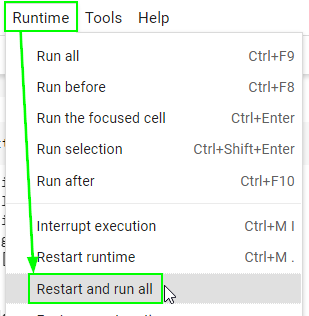

In [39]:
print('🎯 Restart and run all successful')

🎯 Restart and run all successful


In [40]:
# GRADER_ONLY
import os
from datetime import datetime
autograder_output_filename = f"{assignment_name}-autograder-results.csv"

netid = autograded_result["netid"]
assignment_name = autograded_result["assignment_name"]
student_score = autograded_result["student_score"]
total_available = autograded_result["total_available"]
graded_time = datetime.now().strftime("%Y-%m-%d %H:%M")
feedback = '''Assignment: {0}
NetID: {1}
Total Score: {2}/{3}

Grade Breakdown'''.format(assignment_name, netid, student_score, total_available)

for graded_part_name in autograded_result["order"]:
    part_info = autograded_result["breakdown"][graded_part_name]
    feedback += '''
--------------------------------
Component: {0}
Result: {1}
Score: {2}/{3}'''.format(graded_part_name, "Pass" if part_info["did_pass"] else "Fail", part_info["points"], part_info["available_points"])

    feedback += "" if part_info["did_pass"] else f"\nError Message: {part_info['message']}"

if is_autograder_env:
    df_agr_new = pd.DataFrame([{
        "netid": netid,
        "assignment_name": assignment_name,
        "student_score": student_score,
        "total_available": total_available,
        "graded_time": graded_time,
        "feedback": feedback
    }])
    
    if not os.path.exists(autograder_output_filename):
        df_agr = df_agr_new
    else:
        df_agr = pd.read_csv(autograder_output_filename)
        df_agr = df_agr.loc[~((df_agr["netid"] == netid) & (df_agr["assignment_name"] == assignment_name))]
        df_agr = pd.concat([df_agr, df_agr_new])
        
    df_agr.sort_values("graded_time").to_csv(autograder_output_filename, index=None)